# Linear Regression

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [16]:
# import
df = pd.read_csv('dataset/student_scores.csv')

# print first 10 samples
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Dataset training and evaluation

In [19]:
# 1- split data into training/test sets using hold-out strategy
x = df[['Hours']]
y = df['Scores']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# display training/test sets for Scores.
print("training set:")
print(y_train.value_counts())
print("test set:")
print(y_test.value_counts())

# display training/test sets for Hours.
print("training set:")
print(x_train.value_counts())
print("test set:")
print(x_test.value_counts())

training set:
Scores
30    3
25    1
20    1
35    1
86    1
81    1
67    1
60    1
54    1
41    1
95    1
24    1
69    1
27    1
76    1
42    1
88    1
21    1
Name: count, dtype: int64
test set:
Scores
85    1
62    1
47    1
17    1
75    1
Name: count, dtype: int64
training set:
Hours
2.7      2
2.5      2
1.9      1
1.5      1
3.2      1
3.3      1
3.5      1
3.8      1
4.5      1
4.8      1
5.5      1
6.1      1
6.9      1
7.4      1
7.8      1
8.3      1
8.9      1
9.2      1
Name: count, dtype: int64
test set:
Hours
1.1      1
5.1      1
5.9      1
7.7      1
8.5      1
Name: count, dtype: int64


In [21]:
# 2- train the data using the LinearRegression module from sklearn. 
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("test set hours:\n", x_test['Hours'])
print("test set scores:\n", y_test)
print("Predictions on test set:", y_pred)

test set hours:
 10    7.7
11    5.9
1     5.1
14    1.1
3     8.5
Name: Hours, dtype: float64
test set scores:
 10    85
11    62
1     47
14    17
3     75
Name: Scores, dtype: int64
Predictions on test set: [78.67787369 60.59711136 52.56121699 12.38174515 86.71376805]


In [23]:
# 3- display the model's equation.
a = model.coef_[0]
b = model.intercept_
print(f"exact values: a = {a} and b = {b} \nthe equationy y = {a:.2f} * x + {b:.2f}")

exact values: a = 10.044867960003419 and b = 1.3323903939834167 
the equationy y = 10.04 * x + 1.33


/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_9349/2345916908.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


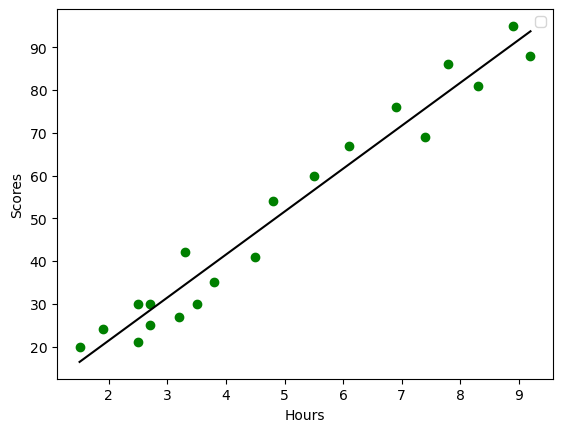

In [25]:
# 4. Create a plot showing the data and the generated model.

x_line = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)

plt.scatter(x_train, y_train, color="green")

plt.plot(x_line, y_line, color="black")

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()

Mean Squared Error (MSE): 46.28
R-squared: 0.92
Root Mean Squared Error (RMSE): 6.80


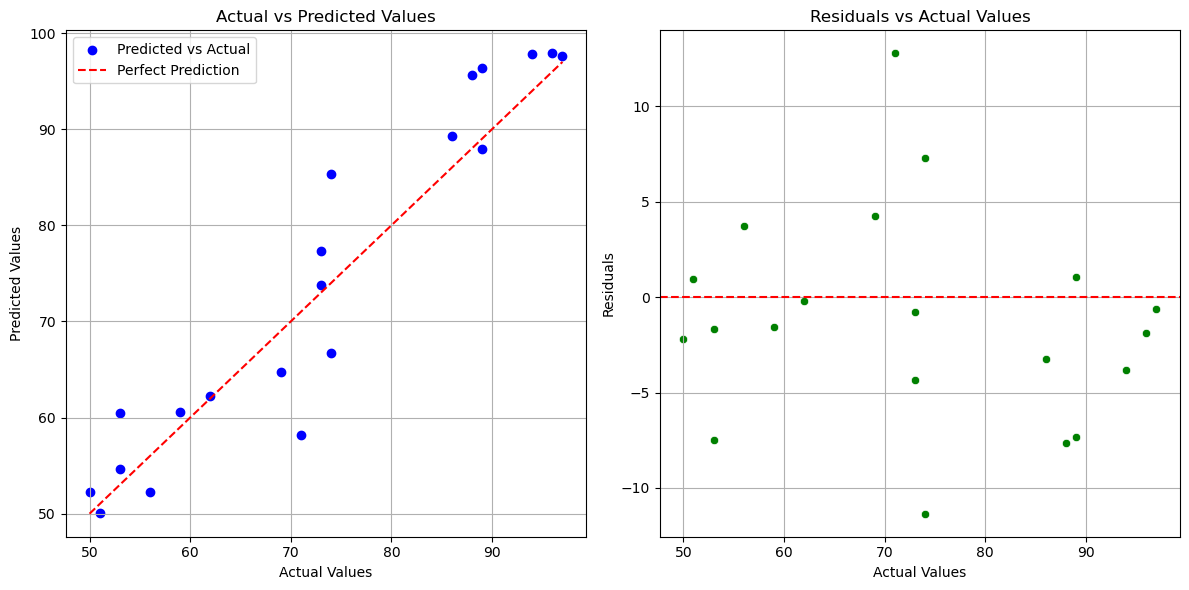

In [27]:
# 5- display the performance of the generated model on the training and the test set, based on the following metrics:, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

r2 = r2_score(y_test, y_pred) 
print(f"R-squared: {r2:.2f}")

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# 6- describe the R-squared metric and its advantages compared to the other metrics.

# R-squared values are between 0 and 1 so it's eay to evaluate the model

# 7- is the generated model characterized by good performance? yeah cuz r-squared is slocer to 1, 
# diference between pred and test if it's big so we have overfitting

# 8- create a plot visualizing the difference between actual and predicted values.

np.random.seed(0)
y_test = np.random.randint(50, 100, size=20)
y_pred = y_test + np.random.normal(0, 5, size=20)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()

residuals = y_test - y_pred

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=residuals, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.grid()

plt.tight_layout()
plt.show()

## Multiple linear regression

### Data description and analysis

<b> The Boston Housing Dataset: </b> the Boston Housing Dataset is derived from information collected by the U.S. Census Service regarding housing in the Boston, Massachusetts area. It aims to predict house prices based on various characteristics. 

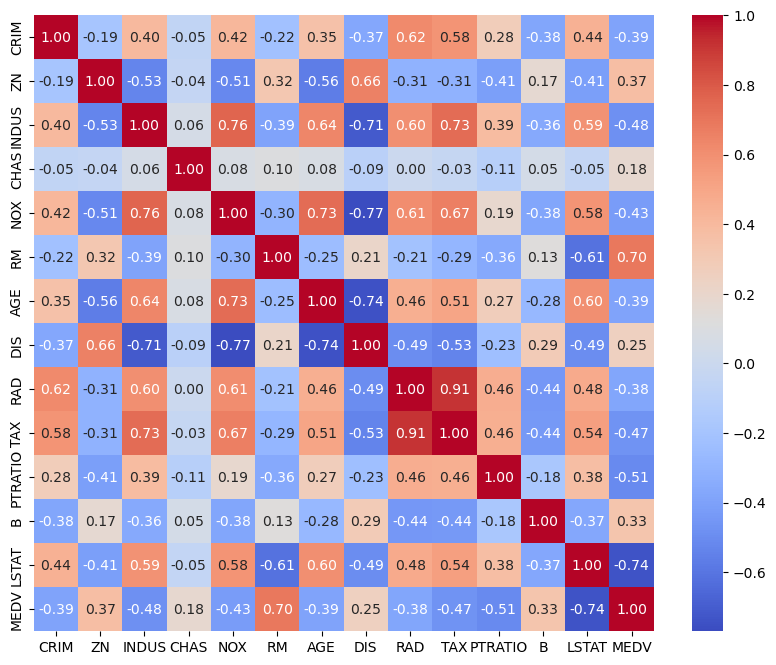

features are:  ['RM', 'LSTAT']
['RM', 'LSTAT']


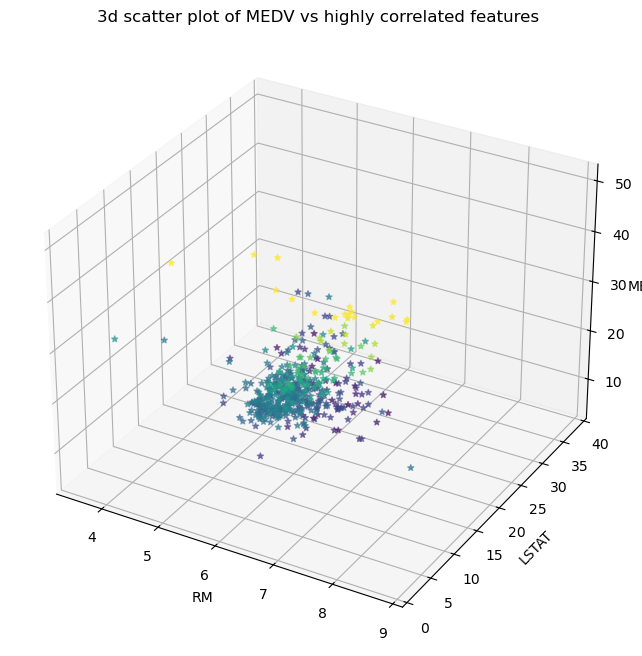


training set:
MEDV
50.0    0.032178
22.0    0.017327
23.1    0.014851
21.7    0.014851
19.3    0.012376
          ...   
32.7    0.002475
21.5    0.002475
29.0    0.002475
34.6    0.002475
12.5    0.002475
Name: proportion, Length: 207, dtype: float64

testing set:
MEDV
25.0    0.029412
50.0    0.029412
20.0    0.029412
17.2    0.029412
12.7    0.019608
          ...   
18.3    0.009804
21.7    0.009804
14.9    0.009804
20.3    0.009804
34.7    0.009804
Name: proportion, Length: 83, dtype: float64
after normalization
       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD  

In [32]:
# importing Boston Housing dataset
df = pd.read_csv('dataset/housing_data.csv')

# display the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# select the highly features with the label MEDV feature using threshold value of 0.6
highly_correlated_features = correlation_matrix['MEDV'].abs() >= 0.6

selected_features = correlation_matrix.index[highly_correlated_features].tolist()
selected_features.remove('MEDV')

print("features are: ", selected_features)

# verify if the selected features represent a linear relationship with the target variable based on 3D plot
feature_1 = selected_features[0]
feature_2 = selected_features[1]
print(selected_features)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[feature_1], df[feature_2], df['MEDV'], c=df['MEDV'], cmap=cm.viridis, marker='*', alpha=0.6)

ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel('MEDV')
ax.set_title('3d scatter plot of MEDV vs highly correlated features')

plt.show()

# split the generated dataset
X = df.drop('MEDV', axis=1) 
# X = X.drop('RM', axis=1) 
# X = X.drop('LSTAT', axis=1) 
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\ntraining set:")
print(y_train.value_counts(normalize=True))

print("\ntesting set:")
print(y_test.value_counts(normalize=True)) 

# normalize the data (excluding the tabel) using the min max scaler strategy
scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print('after normalization')
print(X_normalized_df.head())



### Data training and evaluation

<div class="alert alert-block alert-danger">
    
1. Use the following lines of code to perform training on the Boston Housing dataset.

<div/>

In [68]:
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.0001 ,max_iter=1000, verbose=1)

In [139]:
imputer = SimpleImputer(strategy='mean')

# Stochastic Gradient Descent Regressor SGDR

X = df.drop('MEDV', axis=1)
y = df['MEDV']

selected_features = ['RM', 'LSTAT']
X = df[selected_features]
y = df['MEDV']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = pd.DataFrame(X_train, columns=selected_features)
X_test = pd.DataFrame(X_test, columns=selected_features)

# print(pd.isnull(X_train).sum())

sgdr.fit(X_train, y_train)

# predict
y_pred = sgdr.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 30.97442717825445
R-squared: 0.577624038425266


<div class="alert alert-block alert-danger">

2. Display the convergence graph of the trained model (where x represents the iterations and y is the loss).
3. Vary the learning rate value (0.01, 0.001, 0.0001). By comparing the convergence graphs for each model, what do you observe in terms of convergence and results?
4. Why does the graph not reach the maximum number of iterations when
using the 0.01 learning rate? Which variable controls this behavior?
5. Display the performance of the generated models on the test set based on the following metrics: MAE, MSE, RMSE, and R-squared. Select the best model based on these metrics.
6. Plot the generated plane of the best model and the scaled training data in one 3D plot. What do you observe?
7. Predict the class of the sample shown in the following figure based on the best model.    

<div/>

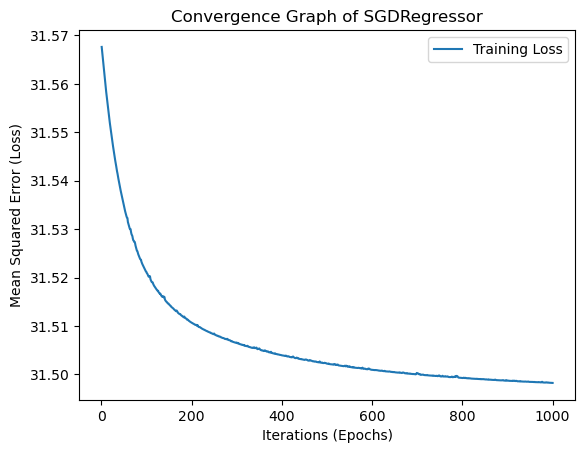

In [123]:
# the convergence graph of trained model (x = iterations, y = the loss)

losses = []
n_epochs = 1000

for epoch in range(n_epochs):
    sgdr.partial_fit(X_train, y_train) 
    loss = np.mean((sgdr.predict(X_train) - y_train) ** 2) 
    losses.append(loss)

plt.plot(range(1, n_epochs + 1), losses, label="Training Loss")
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Convergence Graph of SGDRegressor")
plt.legend()
plt.show()

![title](sample.png)

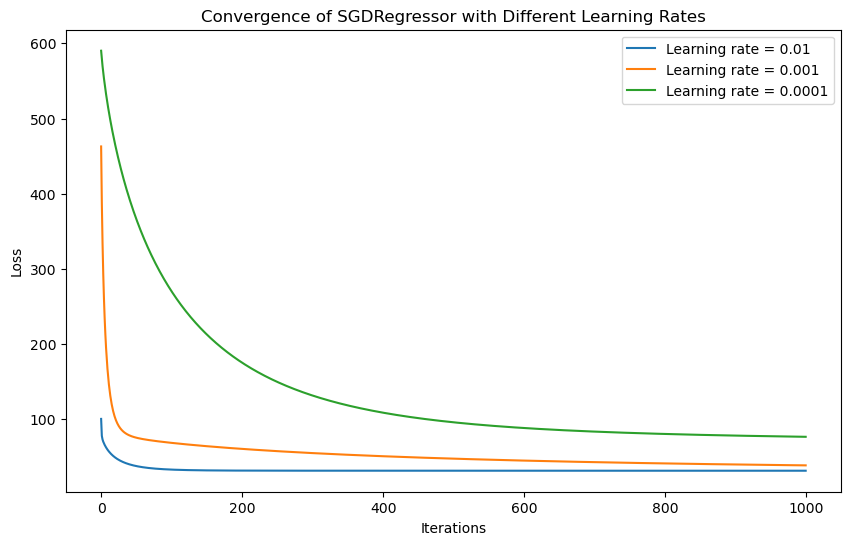

In [141]:
# vary the learning rate (eta0) [0.01, 0.001, 0.0001]

learning_rates = [0.01, 0.001, 0.0001]
# learning_rates = [0.01]
losses = {}

for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=1000, verbose=0, tol=1e-6)
    loss_values = []
    for _ in range(1000): 
        sgdr.partial_fit(X_train, y_train)
        loss = np.mean((sgdr.predict(X_train) - y_train) ** 2)
        loss_values.append(loss)
    losses[lr] = loss_values

plt.figure(figsize=(10, 6))
for lr, loss in losses.items():
    plt.plot(range(len(loss)), loss, label=f'Learning rate = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence of SGDRegressor with Different Learning Rates')
plt.legend()
plt.show()

# rate = 0.01 --> big, it leads to faster convergence
# rate = 0.0001 --> small, it leads to slower convergence

In [143]:
# the graph doesnt' reach the maximum number of iteration when using rate = 0.01 because it is being stable earlier and the loss get less and less
# the variable is the tolerance (tol)

# display the performance of the generated models on the test dataset based on: MAE, MSE, RMSE, and R-squared

results = {}

for lr in learning_rates:
    sgdr = SGDRegressor(learning_rate='invscaling', eta0=lr, max_iter=1000, verbose=0, tol=1e-3)
    sgdr.fit(X_train, y_train)
    y_pred = sgdr.predict(X_test)
    
    # calculate errors
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[lr] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

for lr, metrics in results.items():
    print(f"Learning Rate: {lr}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

# select the best model based on R2 
best_model_lr = max(results, key=lambda lr: results[lr]['R2'])
print(f"the best model is with learning rate: {best_model_lr}")

Learning Rate: 0.01
MAE: 3.8680
MSE: 30.9189
RMSE: 5.5605
R2: 0.5784

Learning Rate: 0.001
MAE: 4.0160
MSE: 34.7706
RMSE: 5.8967
R2: 0.5259

Learning Rate: 0.0001
MAE: 5.6160
MSE: 65.9072
RMSE: 8.1183
R2: 0.1013

the best model is with learning rate: 0.01


/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


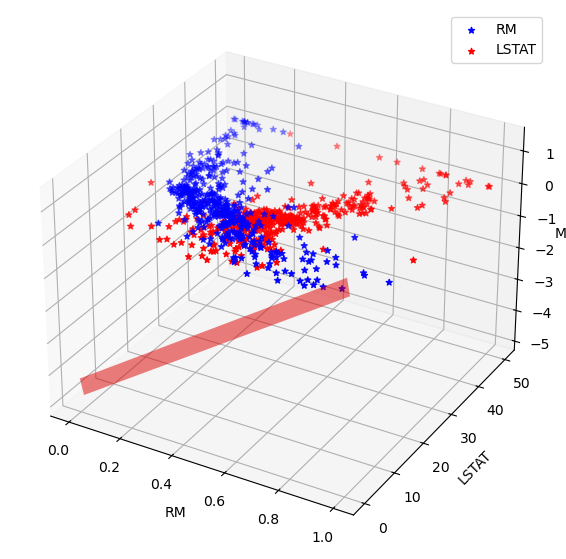

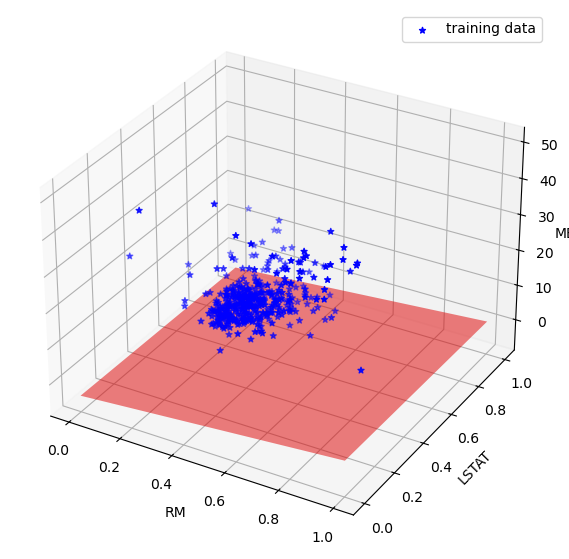

In [157]:
# plot the generated plane of best model which is rate = 0.01 then scaled training data in one 3d plot

# SGDRegressor 
sgdr = SGDRegressor(learning_rate='invscaling', eta0=0.01, max_iter=1000, verbose=0, tol=1e-6)

# feature selection
selected_features = ['RM', 'LSTAT']
X = df[selected_features]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sgdr.fit(X_train, y_train)

x1_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
x2_range = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

X_grid = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

X_grid_scaled = scaler.transform(X_grid)

y_grid = sgdr.predict(X_grid_scaled)

y_grid = y_grid.reshape(x1_mesh.shape)

# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 1], y_train, color='b', label='RM', marker='*')
ax.scatter(X_train[:, 0], y_train, color='r', label='LSTAT', marker='*')

# Plot decision surface
ax.plot_surface(x1_mesh, x2_mesh, y_grid, color='r', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')

# Display the plot
plt.legend()
plt.show()

# 3d plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='b', label='training data', marker='*')

# Plot decision surface
ax.plot_surface(x1_mesh, x2_mesh, y_grid, color='r', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('RM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')

# Display the plot
plt.legend()
plt.show()

In [47]:

# 7. Predict the class of the sample shown in the following figure based on the best model.

In [161]:
# predict MEDV
sample = df[['LSTAT', 'RM']].iloc[0].values.reshape(1, -1)

# scale
sample_scaled = scaler.transform(sample)

# predict
predicted_MEDV = sgdr.predict(sample_scaled)

print(f"predicted MEDV (LTSAT={sample[0][0]}, RM={sample[0][1]}): {predicted_MEDV[0]}")

predicted MEDV (LTSAT=4.98, RM=6.575): 19.091272611355922
